

# Project: Investigate a Dataset : TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**TMDb**: I selected a dataset from DAND to investigating is **The Movies Data** dataset.It has collection of 10,000 movies.The dataset contain 21 variables like director,movie,taglines,popularity,voting etc ..we are going to explore the dependent variables and independent variables.
<ul>
    Here i am going to investigate on some Qusetions like
    <ul>
         <li>Revenue vs Popularity.</li>
         <li>Top director by the popularity.</li>
         <li>Which director directed more movies.</li>
         <li>What is the top gener.</li>
         <li>Runtime over the selected year.</li>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<ul>
  <li>Here we are going to load the data from tmdb-movies.csv and observing the columns and rows.

### General Properties
### Observation:
<ul>
    <li>columns : 21</li>
    <li>rows : 10866</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>director</li>
    <li>revenue</li>
    <li>Null values presens in the columns</li>
    <li>Duplicates row are there(we are going to drop duplicates and null values in the data cleaning section)
        
        
        
        

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_M = pd.read_csv('tmdb-movies.csv')
df_M.head(1)


id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

In [3]:
df_M.shape

(10866, 21)

In [5]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In the above information we came to know that we have some missing values in some columns.


Totaly we have the null values in the 9 .But we are not goning to do drop all the null values.we cleaning only imdb_id,director for exploring data. we are leaving remaing data  as_is.

In [6]:
df_M.isnull().any().sum()

9

In [7]:
df_M.duplicated().sum()

1

We have one duplicate row in the data.

In [8]:
df_M.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

### Data Cleaning (Replace this with more specific notes!)
#### Cleaning steps:
<ul>
    <li>Droping Duplicate(s) row,we know that we have one duplicate row in the data</li>
    <li>cleaning Columns 'imdb_id' and ' director' and 'genres'.</li>
    <li>Save the new clean data as csv file.
        

In [4]:
#droping duplicates
df_M.drop_duplicates(inplace = True)

In [5]:
#checking the duplicates again.
sum(df_M.duplicated())

0

In [6]:
#droping null values in cloumns,what we need to explore.
df_M.dropna(subset = ['imdb_id'],inplace =True)
df_M.dropna(subset = ['director'],inplace = True)
df_M.dropna(subset = ['genres'], inplace = True)
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795 entries, 0 to 10865
Data columns (total 21 columns):
id                      10795 non-null int64
imdb_id                 10795 non-null object
popularity              10795 non-null float64
budget                  10795 non-null int64
revenue                 10795 non-null int64
original_title          10795 non-null object
cast                    10726 non-null object
homepage                2920 non-null object
director                10795 non-null object
tagline                 8024 non-null object
keywords                9348 non-null object
overview                10793 non-null object
runtime                 10795 non-null int64
genres                  10795 non-null object
production_companies    9804 non-null object
release_date            10795 non-null object
vote_count              10795 non-null int64
vote_average            10795 non-null float64
release_year            10795 non-null int64
budget_adj              1

In [8]:
df_M['director'].value_counts()

Woody Allen                           45
Clint Eastwood                        34
Steven Spielberg                      29
Martin Scorsese                       29
Ridley Scott                          23
Ron Howard                            22
Steven Soderbergh                     22
Joel Schumacher                       21
Brian De Palma                        20
Wes Craven                            19
Barry Levinson                        19
Tim Burton                            19
John Carpenter                        18
Rob Reiner                            18
David Cronenberg                      18
Mike Nichols                          18
Tyler Perry                           17
Norman Jewison                        17
Robert Zemeckis                       17
Spike Lee                             17
Francis Ford Coppola                  17
Oliver Stone                          17
Sidney Lumet                          17
Peter Hyams                           17
Renny Harlin    

In [7]:
#save new dataset for next section
df_M.to_csv('tmdb_new.csv',index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Basic Histogram :
<ul>
    **Creating basic histogram**

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#load new data
df = pd.read_csv('tmdb_new.csv')
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

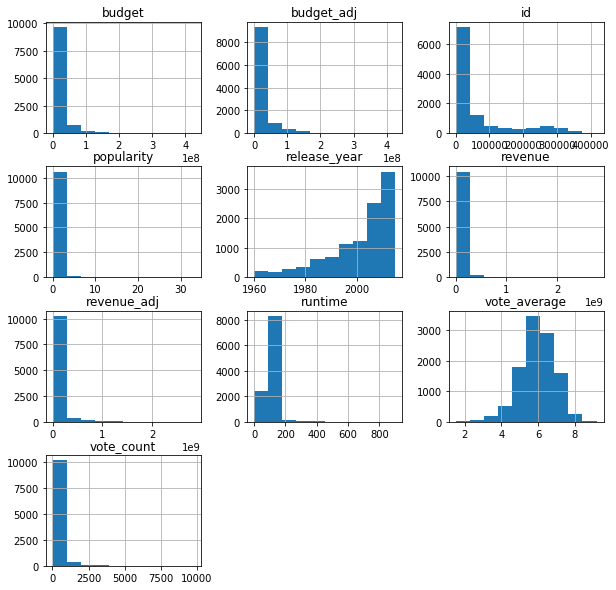

In [12]:
#creating basic histogaram
df.hist(figsize=(10,10));

### Research Question 1:
<ul>
    **Who is top directores over the year?**

In [9]:
#top most directores 
top_dir = df['director'].value_counts()
top_dir[:9]

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Name: director, dtype: int64

It is showing maximum releases by the directores.Here i am going to use  "groupby" to know top directer.

In [11]:
#groupby for director 
dire_df = df.groupby('director')
dire_mean_df=dire_df.mean()
dire_mean_df.head()


id  popularity       budget     revenue  \
director                                                                    
 FrÃ©dÃ©ric Jardin           79070.0    0.434506    2500000.0      3358.0   
A. Todd Smith               370687.0    1.876037          0.0         0.0   
A.R. Murugadoss              14070.0    0.215030    9100000.0  76000000.0   
Aaron Aites                  36124.0    0.108700          0.0         0.0   
Aaron Blaise|Robert Walker   10009.0    1.653031  100000000.0       250.0   

                            runtime  vote_count  vote_average  release_year  \
director                                                                      
 FrÃ©dÃ©ric Jardin             98.0        28.0           5.9        2011.0   
A. Todd Smith                   0.0        11.0           5.4        2015.0   
A.R. Murugadoss               183.0        53.0           6.9        2008.0   
Aaron Aites                    93.0        13.0           6.5        2008.0   
Aaron Blaise|Robert Walker     85.0       753.0           6.8        2003.0   

                              budget_adj   revenue_adj  
director                                                
 FrÃ©dÃ©ric Jardin          2.423495e+06  3.255239e+03  
A. Todd Smith               0.000000e+00  0.000000e+00  
A.R. Murugadoss             9.216358e+06  7.697178e+07  
Aaron Aites                 0.000000e+00  0.000000e+00  
Aaron Blaise|Robert Walker  1.185353e+08  2.963382e+02

In [12]:
dire_mean_df['popularity'].describe()

count    5054.000000
mean        0.512741
std         0.695255
min         0.000973
25%         0.190658
50%         0.339923
75%         0.580375
max        16.696886
Name: popularity, dtype: float64

Here it shows us the maximum popularity of directores is **16.6**.

In [16]:
dire_mean_df['popularity'].nlargest(5)

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Name: popularity, dtype: float64

Text(0,0.5,'Count')

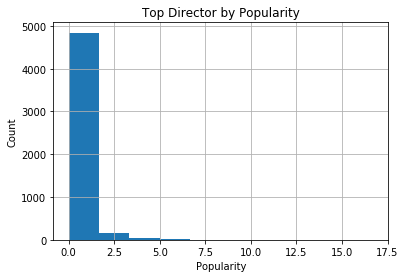

In [26]:
dire_mean_df['popularity'].hist();
plt.title('Top Director by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')

### Observations on director by popularity
<ul>
    <li>The top director over the years is:**Colin Trevorrow**.</li>
    <li>The Distribution is very skewed to the right.
        

### Research Question 2:
<ul>
    **Which director directes more movies over the year?**

In [15]:
top_dir = df['director'].value_counts()
top_dir

Woody Allen                                  45
Clint Eastwood                               34
Steven Spielberg                             29
Martin Scorsese                              29
Ridley Scott                                 23
Ron Howard                                   22
Steven Soderbergh                            22
Joel Schumacher                              21
Brian De Palma                               20
Tim Burton                                   19
Barry Levinson                               19
Wes Craven                                   19
John Carpenter                               18
Rob Reiner                                   18
Mike Nichols                                 18
David Cronenberg                             18
Norman Jewison                               17
Walter Hill                                  17
Oliver Stone                                 17
Peter Hyams                                  17
Renny Harlin                            

Here we came to know that very few directors are directed more than 20 movies,so i am taking only top 10 counts to explore.

Text(0,0.5,'Number of Movies')

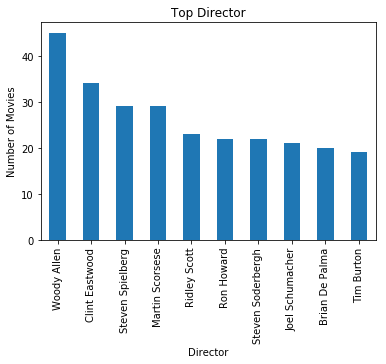

In [16]:
top_dir[:10].plot(kind = 'bar');
plt.title('Top Director')
plt.xlabel('Director')
plt.ylabel('Number of Movies')

#### Observation on directors:
<ul>
    <li>More movies directed by : **Woody Allen**.</li>
    <li>He is totaly directed : **45** movies.
     
        

### Research Question 3  :
#### **What is the popular genre over the year?**
<ul>
    <li>That is we are going to investigate that which type of genre directed most by the directors.

In [17]:
# counting the genres.
top_genre = df['genres'].value_counts()
top_genre[:10]


Drama                   711
Comedy                  707
Documentary             306
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          267
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

In [18]:
df['genres'].describe()

count     10795
unique     2029
top       Drama
freq        711
Name: genres, dtype: object

Text(0,0.5,'Count of Genre')

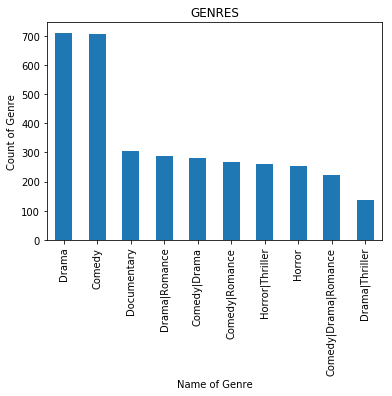

In [19]:
top_genre[:10].plot(kind='bar');
plt.title('GENRES')
plt.xlabel('Name of Genre')
plt.ylabel('Count of Genre')

#### Observation:
<ul>
    <li>The top genre is : Drama.</li>
    <li>The next place taken by : Comedy.</li>
        

### Research Question 4:
<ul>
    <li>**Runtime in the year 2015**.</li>

In [20]:
runtime_df = df.query('release_year == 2015')
runtime_df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

Text(0.5,0,'Runtime')

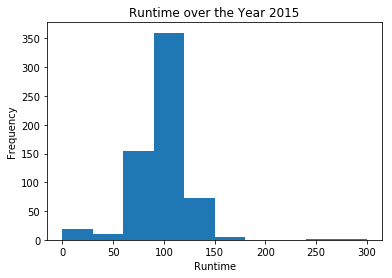

In [21]:
runtime_df['runtime'].plot(kind='hist')
plt.title('Runtime over the Year 2015')
plt.xlabel('Runtime')


#### Observation on runtime in the selected year:
<ul>
    <li>We can observe that the distribution is skewed to the right.

### Research Question 5 :
<ul>
    **How the movie releases taking place over the years?**


Text(0.5,0,'Year')

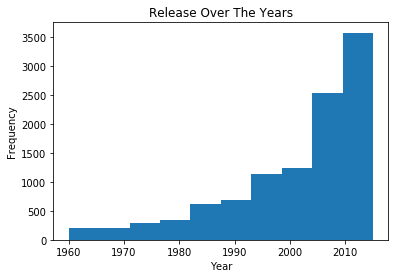

In [23]:
df['release_year'].plot(kind = 'hist');
plt.title('Release Over The Years')
plt.xlabel('Year')

#### Observation :
<ul>
    <li>The movie releases taking place is going higher than year by year.</li>
    <li>The distribution is skewed to the **left**(left-skewed-distribution).
        

### Research Question 6:
<ul>
    <li>**Revenue vs Popularity.**

Text(0,0.5,'Revenue')

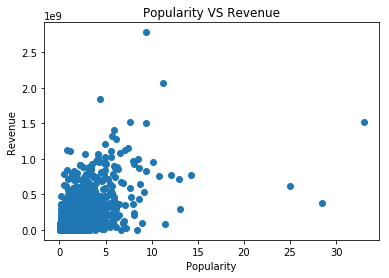

In [24]:
plt.scatter(x=df['popularity'],y=df['revenue']);
plt.title('Popularity VS Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

### Observation:
<ul>
    <li>We can see in the scatter plot and get to knoe that it is Right_skewed.</li>
    <li>The relation between popularity and revenue is postive but not all the time.</li>
    <li>It was more significant and corelated at the lower points(it's clear in the plot) .
        
        

<a id='conclusions'></a>
## Conclusions
<ul>
    <li>From the EDA there is depended variables like movie run time is depended on director popularity.</li>
    <li>The relation between popularity and revenue is positive.</li>
    <li>Year by year the number of movies releasing is increasing.</li>
    <li>Also we observe that top director by popularity and director who directed more movies.</li>
    <li>The Drama genre takes top place.</li>
    <li>However these analysis do not account for collabaratons.</li>
    <li>These project is explore only few points of the data, we can find more relative question on data.</li>
    <li>After these analysis we came to know that, there is a need for further investigation, especially regards to revenue and budget and vote_rating.  
        
    

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0